In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [166]:
dataset=pd.read_excel("E:/kaggle's/flight fare prediction/data/Data_Train.xlsx")
dataset_test=pd.read_excel("E:/kaggle's/flight fare prediction/data/Test_set.xlsx")

In [167]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [218]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [168]:
dataset.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [169]:
dataset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [170]:
dataset.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [171]:
dataset.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [173]:
dataset.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [172]:
dataset_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [14]:
dataset.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [15]:
dataset.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [174]:
dataset.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [175]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [221]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [220]:
#dataset.drop(columns='Route',inplace=True)
dataset_test.drop(columns='Route',inplace=True,axis=1)

In [177]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [178]:
dataset.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [179]:
dataset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [180]:
dataset.Total_Stops.fillna('1 stop',inplace=True)

In [181]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [182]:
dataset.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [222]:
dataset_test.Destination.unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [223]:
dataset.replace(to_replace="New Delhi",value="Delhi",inplace=True)
dataset_test.replace(to_replace="New Delhi",value="Delhi",inplace=True)


In [184]:
dataset.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [185]:
dataset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

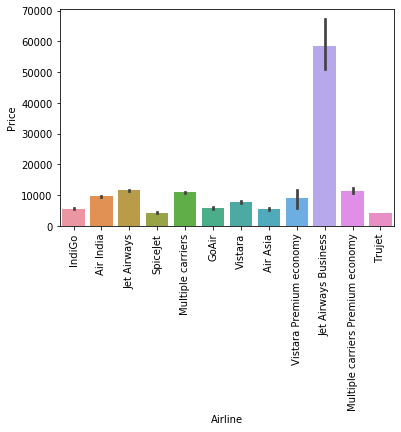

In [188]:
sns.barplot(x=dataset.Airline,y=dataset.Price)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

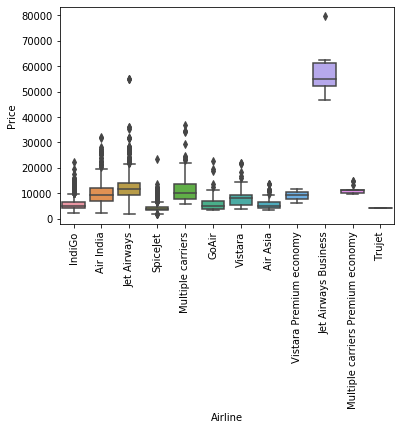

In [189]:
sns.boxplot(x=dataset.Airline,y=dataset.Price)
plt.xticks(rotation=90)


In [47]:
#dataset.replace(to_replace=["Multiple carriers Premium economy","Jet Airways Business","Vistara Premium economy","Trujet"],
              #  value="Others",inplace=True)

In [191]:
dataset_backup=dataset.copy()

In [192]:
dataset.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

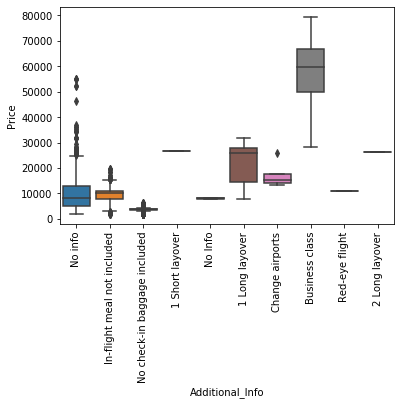

In [193]:
sns.boxplot(x=dataset.Additional_Info,y=dataset.Price)
plt.xticks(rotation=90);

In [196]:
dataset.replace(to_replace="No Info",value="No info",inplace=True)

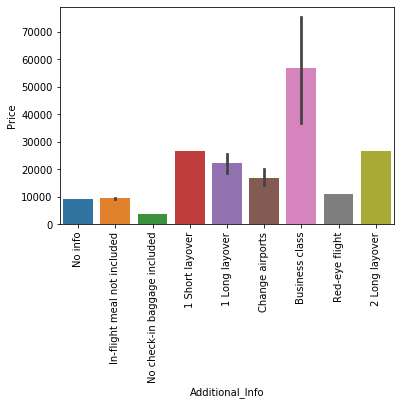

In [225]:
sns.barplot(x=dataset.Additional_Info,y=dataset.Price)
plt.xticks(rotation=90);

In [53]:
#dataset.replace(to_replace=["1 Long layover","2 Long layover","1 Short layover"],value="Layover",inplace=True)

In [55]:
#dataset.replace(to_replace=["Change airports","Business class","Red-eye flight"],value="Others",inplace=True)

In [198]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [226]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [199]:
dataset['Date_of_Journey'] = pd.to_datetime(dataset['Date_of_Journey'])

In [227]:
dataset_test['Date_of_Journey'] = pd.to_datetime(dataset_test['Date_of_Journey'])

In [200]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [201]:
dataset['Date_of_travel']=dataset['Date_of_Journey'].dt.day
dataset['Day_of_travel']=dataset['Date_of_Journey'].dt.dayofweek
dataset['month_of_travel']=dataset['Date_of_Journey'].dt.month
#dataset['D_of_travel']=dataset['Date_of_Journey'].dt.day

In [228]:
dataset_test['Date_of_travel']=dataset_test['Date_of_Journey'].dt.day
dataset_test['Day_of_travel']=dataset_test['Date_of_Journey'].dt.dayofweek
dataset_test['month_of_travel']=dataset_test['Date_of_Journey'].dt.month

In [202]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1


In [203]:
dataset["Dept_minute"]=pd.to_datetime(dataset.Dep_Time).dt.minute

In [229]:
dataset_test["Dept_minute"]=pd.to_datetime(dataset_test.Dep_Time).dt.minute

In [204]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12,5
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1,50


In [205]:
dataset["Dept_hour"]=pd.to_datetime(dataset.Dep_Time).dt.hour

In [230]:
dataset_test["Dept_hour"]=pd.to_datetime(dataset_test.Dep_Time).dt.hour

In [206]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3,20,22
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1,50,5
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9,25,9
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12,5,18
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1,50,16


In [207]:
dataset['Arrival_minute']=pd.to_datetime(dataset.Arrival_Time).dt.minute

In [231]:
dataset_test['Arrival_minute']=pd.to_datetime(dataset_test.Arrival_Time).dt.minute

In [208]:
dataset["Arrival_hour"]=pd.to_datetime(dataset.Arrival_Time).dt.hour

In [232]:
dataset_test["Arrival_hour"]=pd.to_datetime(dataset_test.Arrival_Time).dt.hour

In [209]:
def hour_to_min(data):
    data=data.split(' ')
    if(len(data)==1):
        if(data[0][-1]=='h'):
            x=int(data[0][:-1])*60
            return x
        if(data[0][-1]=='m'):
            x=int(data[0][:-1])
            return x
    else:
        x=int(data[0][:-1])*60 + int(data[1][:-1])
        return x
    
    
    

In [210]:
dataset["Duration_of_travel"]=dataset["Duration"].apply(hour_to_min)

In [233]:
dataset_test["Duration_of_travel"]=dataset_test["Duration"].apply(hour_to_min)

In [211]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3,20,22,10,1,170
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1,50,5,15,13,445
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9,25,9,25,4,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12,5,18,30,23,325
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1,50,16,35,21,285


In [234]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,Jet Airways,2019-06-06,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,3,6,30,17,25,4,655
1,IndiGo,2019-12-05,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,5,3,12,20,6,20,10,240
2,Jet Airways,2019-05-21,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,1,5,15,19,0,19,1425
3,Multiple carriers,2019-05-21,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,1,5,0,8,0,21,780
4,Air Asia,2019-06-24,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,0,6,55,23,45,2,170


In [212]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Date_of_travel', 'Day_of_travel', 'month_of_travel', 'Dept_minute',
       'Dept_hour', 'Arrival_minute', 'Arrival_hour', 'Duration_of_travel'],
      dtype='object')

In [213]:
dataset.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time', 'Duration'],inplace=True)

In [235]:
dataset_test.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time', 'Duration'],inplace=True)

In [214]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,24,6,3,20,22,10,1,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,5,1,50,5,15,13,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,4,9,25,9,25,4,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,3,12,5,18,30,23,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,3,3,1,50,16,35,21,285


In [236]:
dataset_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,3,6,30,17,25,4,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,5,3,12,20,6,20,10,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,1,5,15,19,0,19,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,1,5,0,8,0,21,780
4,Air Asia,Banglore,Delhi,non-stop,No info,24,0,6,55,23,45,2,170


In [247]:
dataset.replace(to_replace="non-stop",value=0,inplace=True)
dataset.replace(to_replace="1 stop",value=1,inplace=True)
dataset.replace(to_replace="2 stops",value=2,inplace=True)
dataset.replace(to_replace="3 stops",value=3,inplace=True)
dataset.replace(to_replace="4 stops",value=4,inplace=True)

In [237]:
dataset_test.replace(to_replace="non-stop",value=0,inplace=True)
dataset_test.replace(to_replace="1 stop",value=1,inplace=True)
dataset_test.replace(to_replace="2 stops",value=2,inplace=True)
dataset_test.replace(to_replace="3 stops",value=3,inplace=True)
dataset_test.replace(to_replace="4 stops",value=4,inplace=True)

In [216]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,IndiGo,Banglore,Delhi,0,No info,3897,24,6,3,20,22,10,1,170
1,Air India,Kolkata,Banglore,2,No info,7662,5,5,1,50,5,15,13,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,4,9,25,9,25,4,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,3,12,5,18,30,23,325
4,IndiGo,Banglore,Delhi,1,No info,13302,3,3,1,50,16,35,21,285


In [238]:
from sklearn.preprocessing import LabelEncoder


In [239]:
encoder_Airline=LabelEncoder()
dataset.Airline=encoder_Airline.fit_transform(dataset.Airline)
dataset_test.Airline=encoder_Airline.fit_transform(dataset_test.Airline)

In [240]:
encoder_Source=LabelEncoder()
dataset.Source=encoder_Source.fit_transform(dataset.Source)
dataset_test.Source=encoder_Source.fit_transform(dataset_test.Source)

In [241]:
encoder_Destination=LabelEncoder()
dataset.Destination=encoder_Destination.fit_transform(dataset.Destination)
dataset_test.Destination=encoder_Destination.fit_transform(dataset_test.Destination)

In [249]:
encoder_Additional_info=LabelEncoder()
dataset.Additional_Info=encoder_Additional_info.fit_transform(dataset.Additional_Info)
dataset_test.Additional_Info=encoder_Additional_info.fit_transform(dataset_test.Additional_Info)

In [250]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,3,0,2,0,7,3897,24,6,3,20,22,10,1,170
1,1,3,0,2,7,7662,5,5,1,50,5,15,13,445
2,4,2,1,2,7,13882,6,4,9,25,9,25,4,1140
3,3,3,0,1,7,6218,5,3,12,5,18,30,23,325
4,3,0,2,1,7,13302,3,3,1,50,16,35,21,285


In [246]:
dataset_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_travel,Day_of_travel,month_of_travel,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,Duration_of_travel
0,4,2,1,1,5,6,3,6,30,17,25,4,655
1,3,3,0,1,5,5,3,12,20,6,20,10,240
2,4,2,1,1,3,21,1,5,15,19,0,19,1425
3,6,2,1,1,5,21,1,5,0,8,0,21,780
4,0,0,2,0,5,24,0,6,55,23,45,2,170


In [251]:
dataset.to_excel("train_data_preprocessed.xlsx")

In [252]:
dataset_test.to_excel("test_data_preprocessed.xlsx")